In [1]:
#Importing Required libraries for Analysis and Prediction
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('bike_sharing.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Data contains no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# All the date information is already stored in data in seperate columns, so we remove the dteday variable
data.drop(['instant','dteday'],axis=1,inplace=True)

In [6]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# So We will first analyse the data
# See the pattern of rental count
# Manipulate the data

## 1. Cleaning the Data and Handling categorical Variables

In [8]:
#Season variable to caegorical and to dummy variable
data['season']=data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
# Weathersit to categorical
data['weathersit']=data['weathersit'].map({1:'weathersit_1',2:'weathersit_2',3:'weathersit_3',4:'weathersit_4'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
data['weathersit'].value_counts()

weathersit_1    463
weathersit_2    246
weathersit_3     21
Name: weathersit, dtype: int64

In [12]:
# Month to categorical
data['mnth']=data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
data['mnth'].value_counts()

Oct      62
May      62
Dec      62
Aug      62
Mar      62
July     62
Jan      62
June     60
April    60
Nov      60
Sep      60
Feb      56
Name: mnth, dtype: int64

In [14]:
# These Variables will convert to Dummy variables after Data Visualisation

## 2. Data Visualisation 

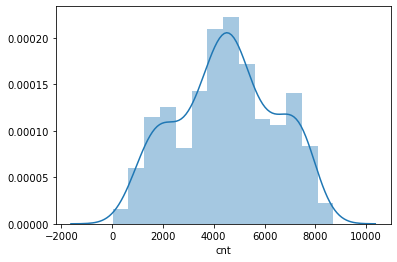

In [15]:
plt.figure()
sns.distplot(data['cnt'])
plt.show()

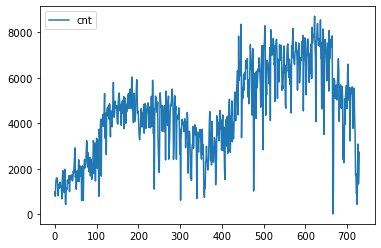

In [16]:
#daywise distribution of count
data.plot.line(y='cnt')

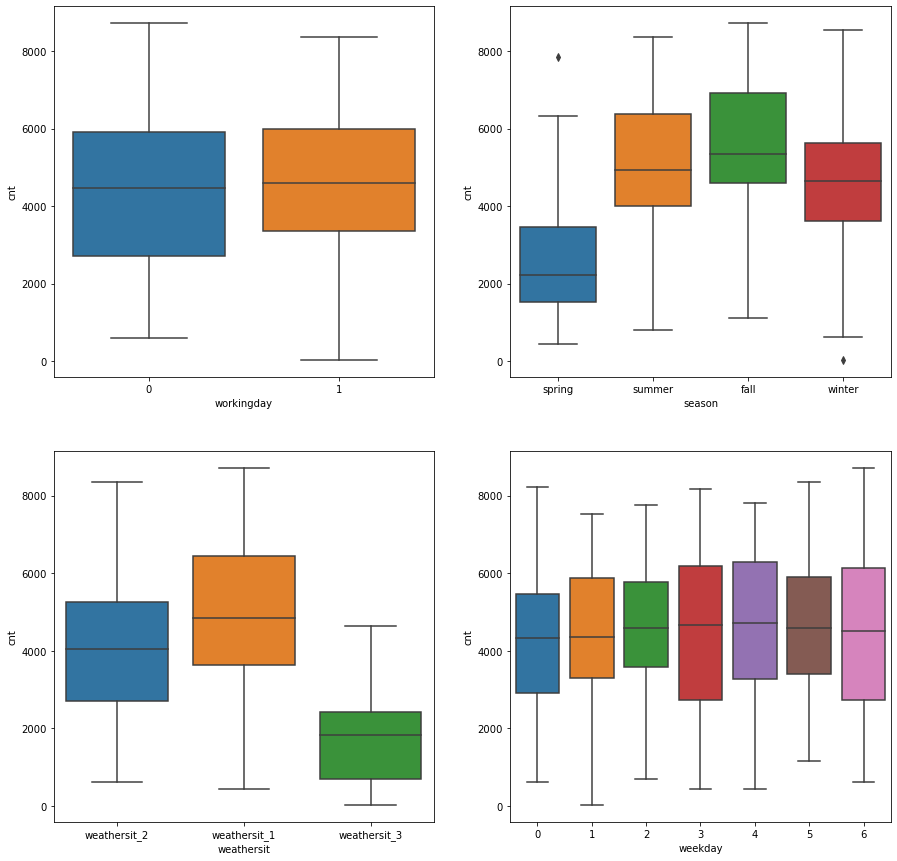

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(x='workingday', y='cnt',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='season', y='cnt',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='weathersit', y='cnt',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='weekday', y='cnt',data=data)
plt.show()

- The Spring Season has lowest count while the fall has the most.
- Spring means months of march april and May, when the pandemic started  resulting in low count
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds has the lowest count of bike sharing
- Working Day or weekday has almost no impact on count

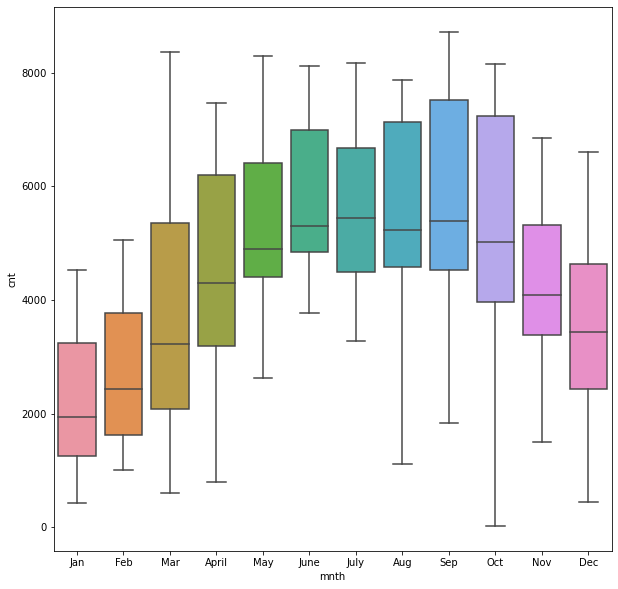

In [18]:
# Month wise variation count
plt.figure(figsize=(10,10))

sns.boxplot(x='mnth', y='cnt',data=data)

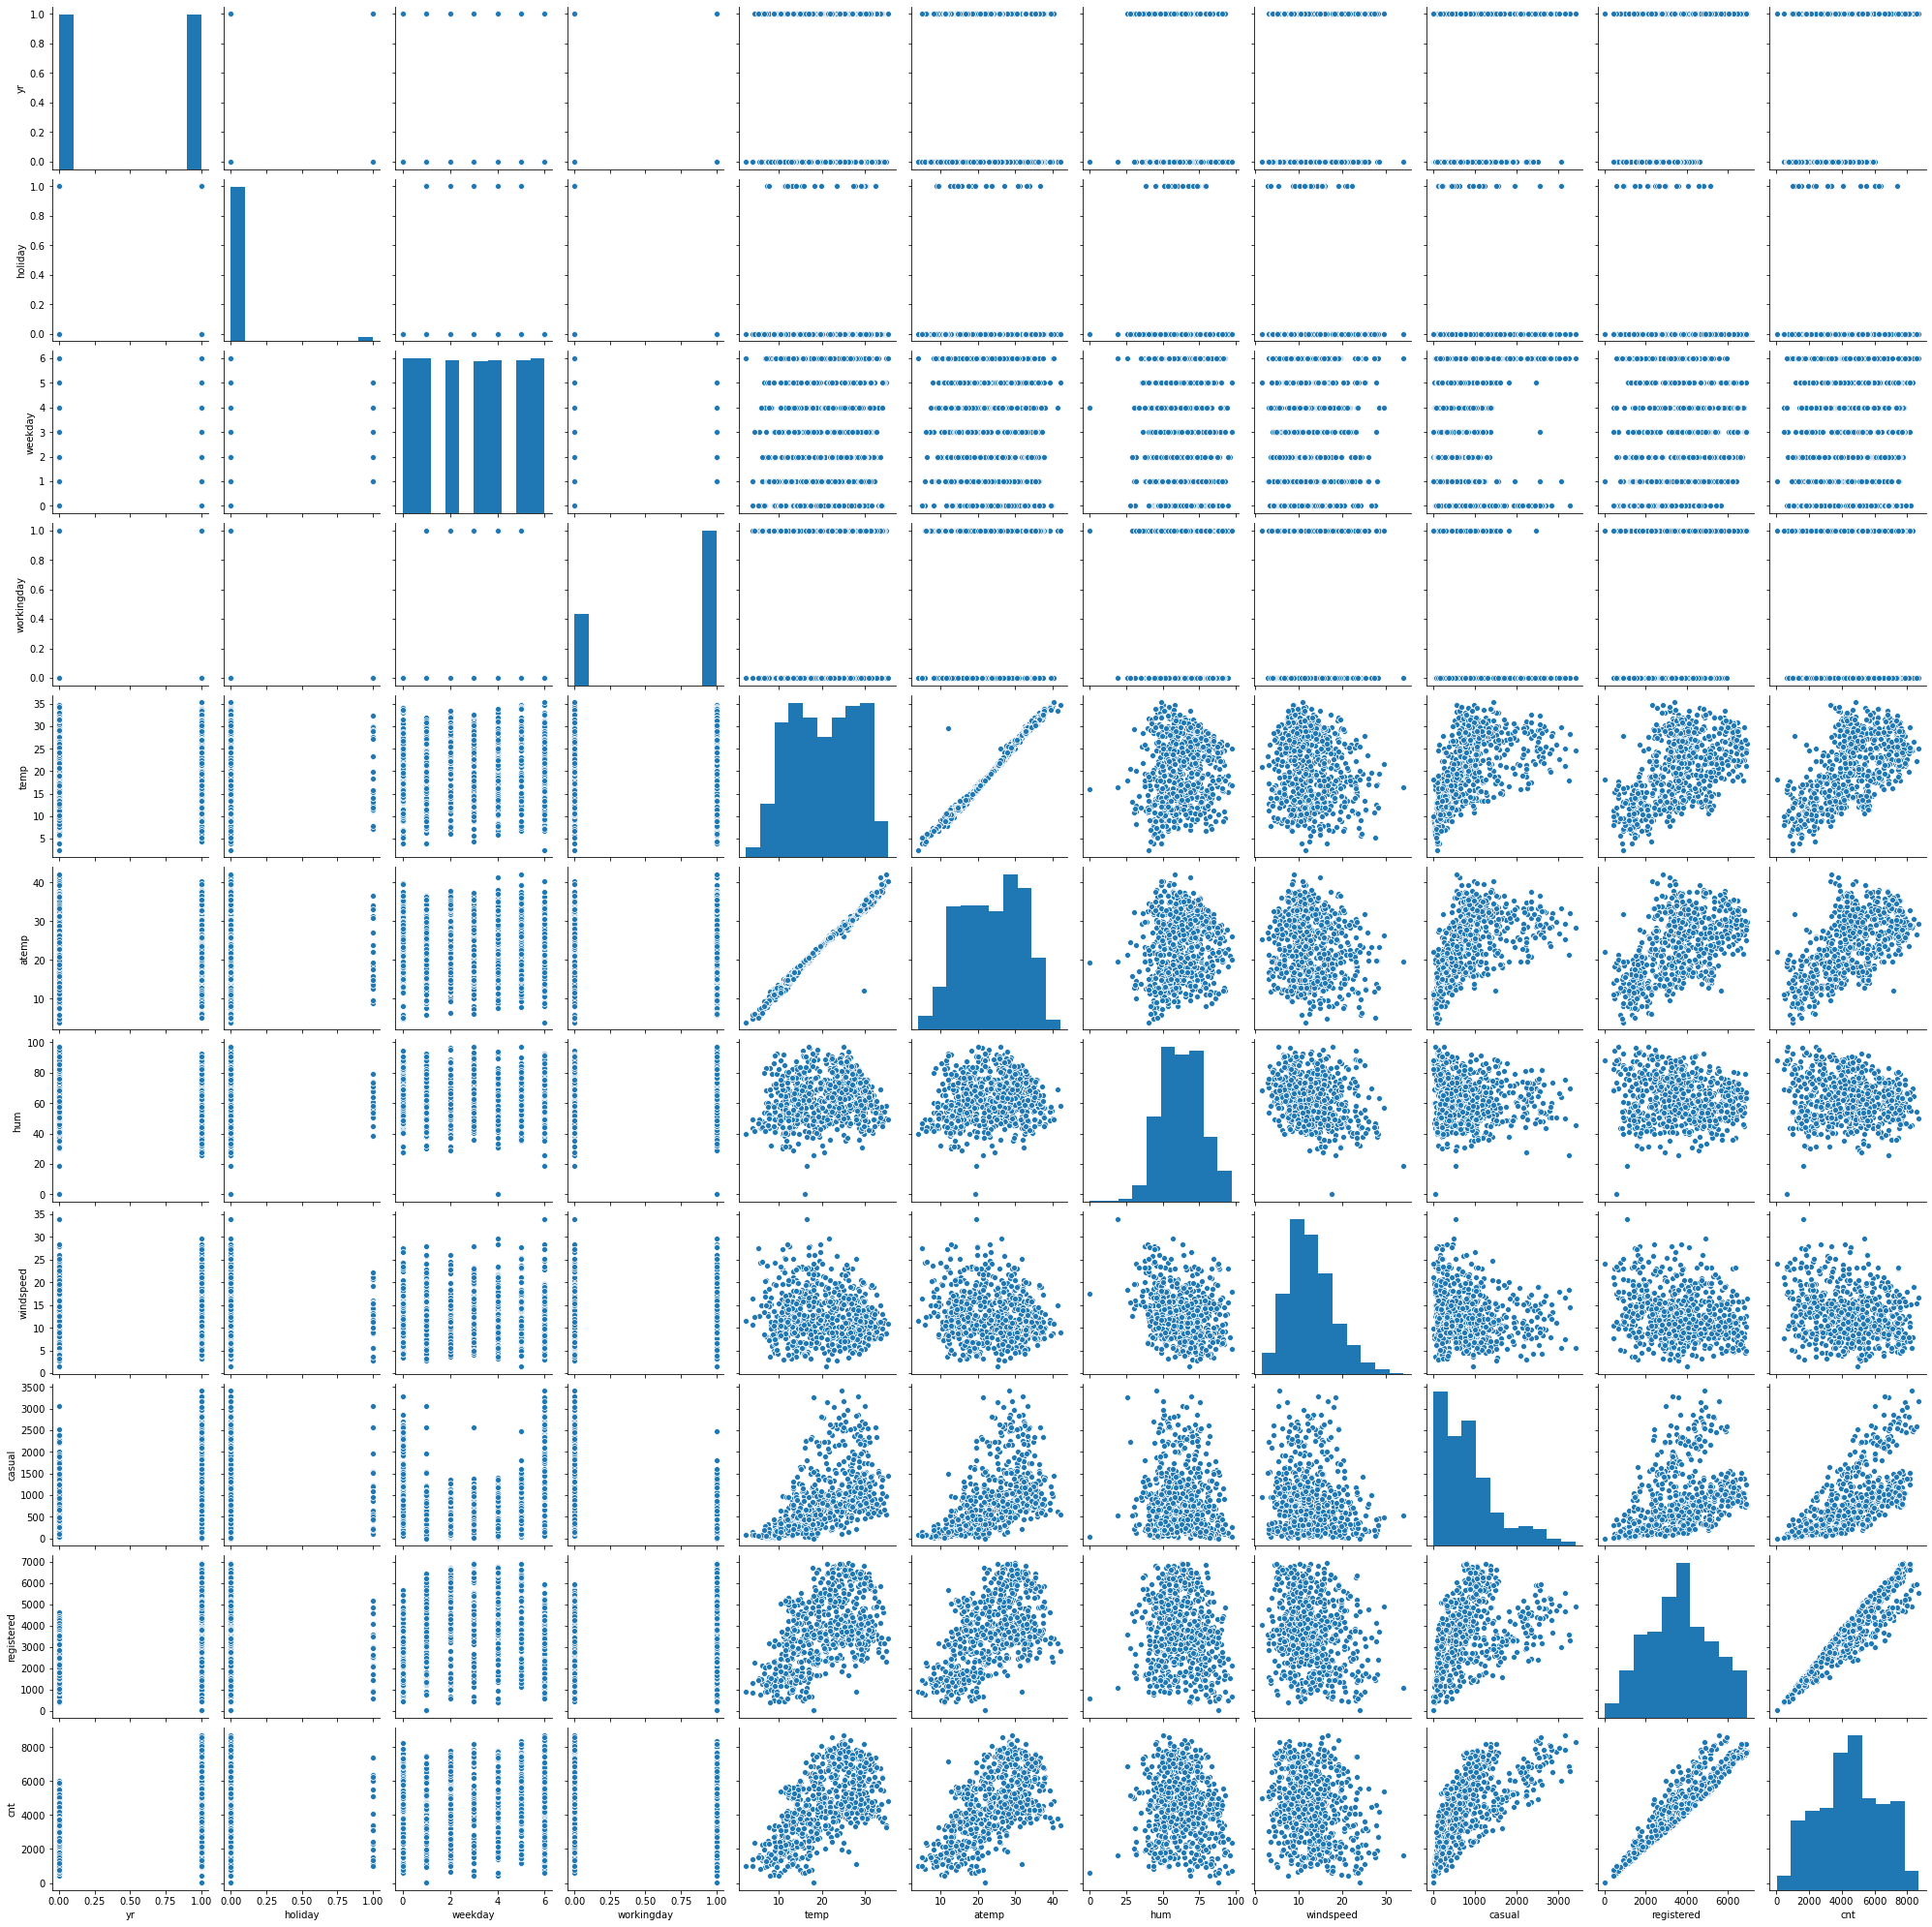

In [19]:
# lets visualize the scatter plot
sns.pairplot(data)

- We see Temp and atemp showing linear relationship with count variable
- Registered has almost same behaviour as count, so we will remove it at first


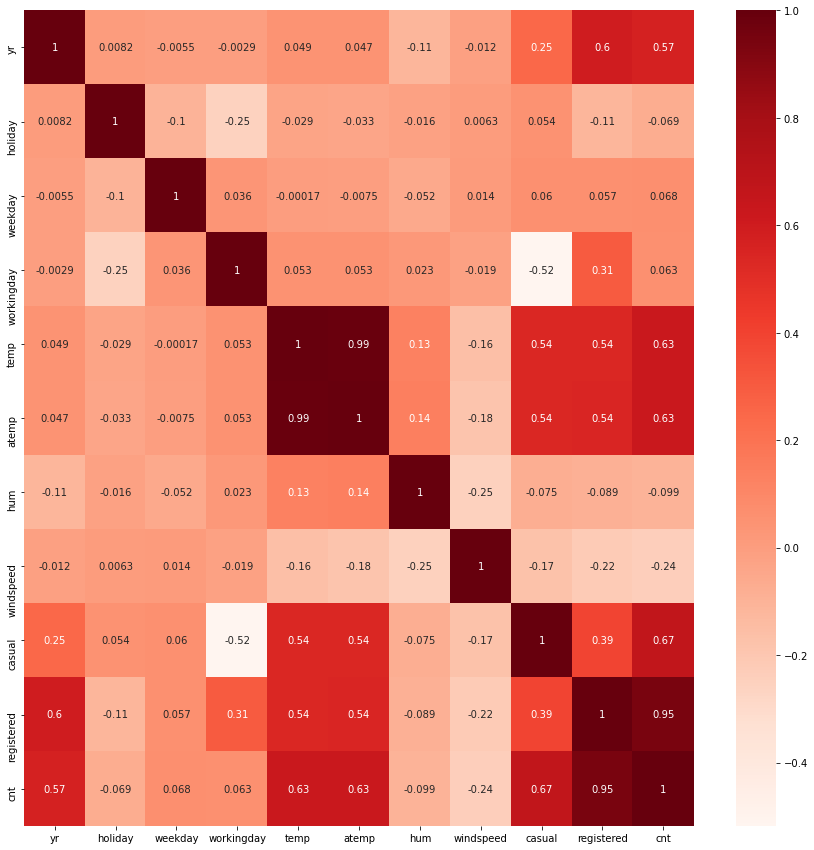

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='Reds',annot=True)
plt.show()

## Getting Dummy Variables for my categorical variable and adding them to dataset

In [21]:
season=pd.get_dummies(data['season'],drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [22]:
data=pd.concat([data,season],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [23]:
data.drop('season',axis=1,inplace=True)

In [24]:
weathersit=pd.get_dummies(data['weathersit'],drop_first=True)
weathersit

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [25]:
data=pd.concat([data,weathersit],axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,weathersit_2,weathersit_3
0,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [26]:
data.drop('weathersit',axis=1,inplace=True)

In [27]:
mnth=pd.get_dummies(data['mnth'],drop_first=True)
mnth

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [28]:
data=pd.concat([data,mnth],axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [29]:
data.drop('mnth',axis=1,inplace=True)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


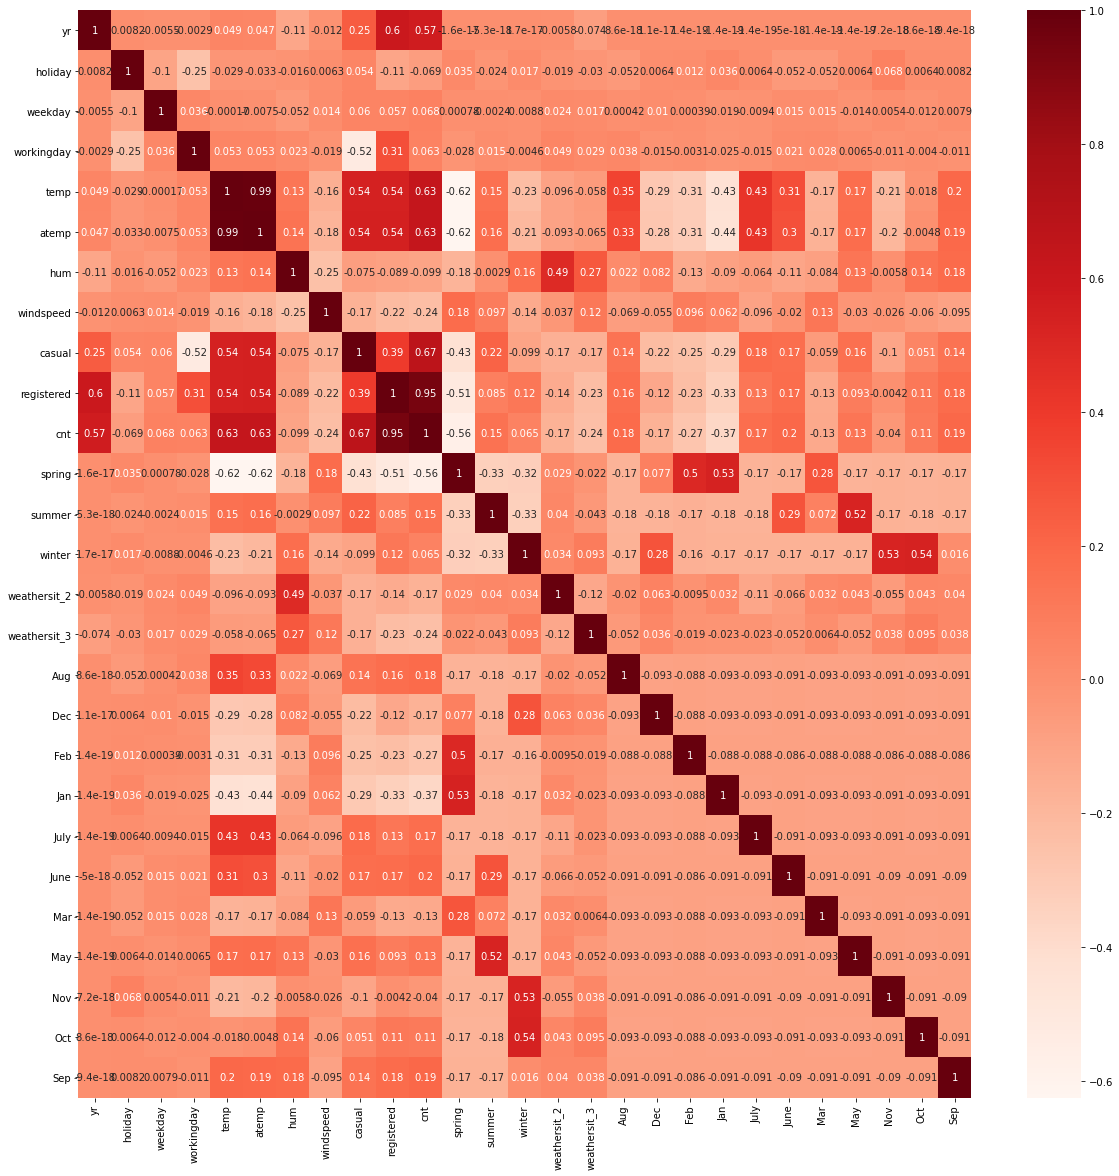

In [30]:
# Getting heatmap for the corelation for all the variables
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='Reds',annot=True)
plt.show()

## Automated Way

In [31]:
# Splitting into test and train
df_train,df_test=train_test_split(data,train_size=0.7,random_state=100)
print(df_train.shape)

(510, 27)


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   weekday       510 non-null    int64  
 3   workingday    510 non-null    int64  
 4   temp          510 non-null    float64
 5   atemp         510 non-null    float64
 6   hum           510 non-null    float64
 7   windspeed     510 non-null    float64
 8   casual        510 non-null    int64  
 9   registered    510 non-null    int64  
 10  cnt           510 non-null    int64  
 11  spring        510 non-null    uint8  
 12  summer        510 non-null    uint8  
 13  winter        510 non-null    uint8  
 14  weathersit_2  510 non-null    uint8  
 15  weathersit_3  510 non-null    uint8  
 16  Aug           510 non-null    uint8  
 17  Dec           510 non-null    uint8  
 18  Feb           510 non-null  

In [33]:
# Scaling of Continous varibales 
num_vars=['cnt','temp','atemp','hum','windspeed','casual','registered']
scaler=MinMaxScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,...,0,0,0,1,0,0,0,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,...,1,0,0,0,0,0,0,0,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,...,0,0,0,0,0,0,0,0,0,0
111,0,0,5,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Seperating dependent and independent
y_train=df_train.pop('cnt')
x_train=df_train

In [35]:
# Dropping Atemp,casual and registered because of their nature and data understanding
x_train.drop(['atemp','casual','registered'],axis=1,inplace=True) 

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
# Model Building taking 15 variables in the beginning using RFE
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(x_train,y_train)

In [37]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 11),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', False, 5),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [38]:
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'weathersit_3', 'July', 'Sep'],
      dtype='object')

In [39]:
x_train_rfe=x_train[col]
x_train_sm=sm.add_constant(x_train_rfe)

In [40]:
# Seeing VIF for these 15 variables
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,summer,1.76
6,winter,1.68
8,July,1.55
9,Sep,1.29
7,weathersit_3,1.09
1,holiday,1.04


In [41]:
# Checking model and p values for these 15
lr=sm.OLS(y_train,x_train_sm)
model=lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.79e-186
Time:                        19:37:09   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.292      0.000       0.217       0.319
yr               0.2259      0.008     27.118      0.000       0.210       0.242
holiday         -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp             0.6200      0.023     27.492      0.000       0.576       0.664
hum             -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed       -0.2059      0.026     -7.889      0.000      -0.257      -0.155
summer           0.0800      0.011      7.281      0.000       0.058       0.102
winter           0.1390      0.011     12.903      0.000       0.118       0.160
weathersit_3    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
July            -0.0482      0.018     -2.606      0.009      -0.085      -0.012
Sep              0.0944      0.016      5.724      0.000       0.062       0.127
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Dropping Hum because of high VIF and windspeed beacasue its insignificant
x_train.drop(['windspeed','hum'],axis=1,inplace=True)

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
# Taking 13 variables for RFE
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(x_train,y_train)

In [44]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 10),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', False, 9),
 ('June', False, 7),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [45]:
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'weathersit_2',
       'weathersit_3', 'Aug', 'Sep'],
      dtype='object')

In [46]:
x_train_rfe=x_train[col]
x_train_sm=sm.add_constant(x_train_rfe)

In [47]:
# Seeing VIF , all looks good
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,4.20
0,yr,2.07
4,summer,2.06
8,Aug,1.71
5,winter,1.65
6,weathersit_2,1.58
3,spring,1.46
9,Sep,1.37
7,weathersit_3,1.07
1,holiday,1.04


In [48]:
#model gives good Rsquared and adjusted rsquared
lr=sm.OLS(y_train,x_train_sm)
model=lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.11e-180
Time:                        19:37:09   Log-Likelihood:                 480.96
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     499   BIC:                            -893.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1212      0.030      4.001      0.000       0.062       0.181
yr               0.2324      0.009     27.270      0.000       0.216       0.249
holiday         -0.0982      0.027     -3.640      0.000      -0.151      -0.045
temp             0.4904      0.034     14.434      0.000       0.424       0.557
spring          -0.0438      0.023     -1.899      0.058      -0.089       0.002
summer           0.0732      0.017      4.339      0.000       0.040       0.106
winter           0.1154      0.019      6.067      0.000       0.078       0.153
weathersit_2    -0.0792      0.009     -8.713      0.000      -0.097      -0.061
weathersit_3    -0.2980      0.025    -11.700      0.000      -0.348      -0.248
Aug              0.0454      0.018      2.454      0.014       0.009       0.082
Sep              0.1119      0.018      6.190      0.000       0.076       0.147
==============================================================================
Omnibus:                       67.669   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.293
Skew:                          -0.682   Prob(JB):                     2.86e-37
Kurtosis:                       5.462   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
y_train_pred=model.predict(x_train_sm)

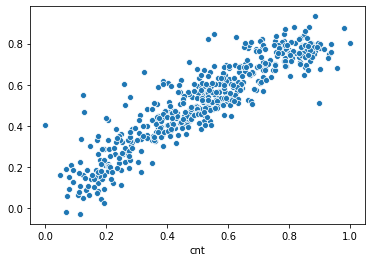

In [50]:
sns.scatterplot(y_train,y_train_pred)

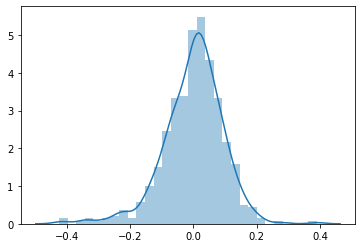

In [51]:
# Seeing if residuals have any pattern
res=y_train-y_train_pred
sns.distplot(res)

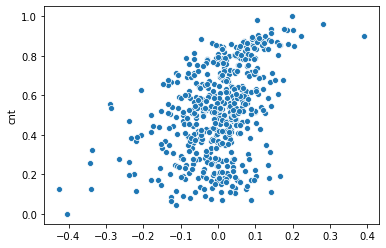

In [52]:
sns.scatterplot(res,y_train)

In [53]:
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,...,0,0,0,1,0,0,0,0,0,0
535,1,0,3,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,...,0,0,0,0,1,0,0,0,0,0
299,0,0,4,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,...,0,0,0,0,0,0,0,0,1,0
221,0,0,3,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,...,0,0,0,0,0,0,0,0,0,0
152,0,0,4,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,...,0,0,0,0,1,0,0,0,0,0


In [54]:
y_test=df_test.pop('cnt')
x_test=df_test

In [55]:
x_test_rfe=x_test[col]
x_test_sm=sm.add_constant(x_test_rfe)

In [56]:
y_test_pred=model.predict(x_test_sm)

In [57]:
y_test_pred.shape

(220,)

## R2 Score

In [58]:
# R2 score for test data
r2=r2_score(y_test,y_test_pred)
r2

0.8045617591443911